<a href="https://colab.research.google.com/github/hindanjali/Assignment2_part_a/blob/main/Part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!gdown --id 1al_urPODDfWOup_Tp33NtVFlCopuLbvW

Downloading...
From: https://drive.google.com/uc?id=1al_urPODDfWOup_Tp33NtVFlCopuLbvW
To: /content/flower_photos.tgz
229MB [00:03, 66.7MB/s]


In [13]:
!unzip /content/drive/MyDrive/nature_12K.zip

Streaming output truncated to the last 5000 lines.
  inflating: inaturalist_12K/train/Arachnida/1ac25349af662e85f577a31f64beca41.jpg  
  inflating: inaturalist_12K/train/Arachnida/117ef7f1812725f359500448a258e713.jpg  
  inflating: inaturalist_12K/train/Arachnida/6409254954c3b46d88d64f0bf4c632fa.jpg  
  inflating: inaturalist_12K/train/Arachnida/aaed865750bd52944658a7dd23366948.jpg  
  inflating: inaturalist_12K/train/Arachnida/460cc09ef510d400a4d47a836ddd45e6.jpg  
  inflating: inaturalist_12K/train/Arachnida/55c48c3afef0b745e53951284cdb2db4.jpg  
  inflating: inaturalist_12K/train/Arachnida/bff3daa961ee96a37ebe12dc0bcce504.jpg  
  inflating: inaturalist_12K/train/Arachnida/9082d4f2107bccf1f14d71c8944be607.jpg  
  inflating: inaturalist_12K/train/Arachnida/93d0130423d42f7c6228150eb95a2a93.jpg  
  inflating: inaturalist_12K/train/Arachnida/051aba6d7bc324bad76bd438ed3cc276.jpg  
  inflating: inaturalist_12K/train/Arachnida/67595af09c015c7753d5d4935677590f.jpg  
  inflating: inaturalist_

In [14]:
train_dir="/content/inaturalist_12K/train"

In [15]:
import pathlib
train_dir = pathlib.Path(train_dir)

In [16]:
list(train_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/inaturalist_12K/train/Arachnida/ed9d7ce290979315880238cef049f2ad.jpg'),
 PosixPath('/content/inaturalist_12K/train/Arachnida/228cb86979512812bb38bbabf9859434.jpg'),
 PosixPath('/content/inaturalist_12K/train/Arachnida/4970ed34d68bdc965d34763b08a4de3b.jpg'),
 PosixPath('/content/inaturalist_12K/train/Arachnida/688456c28acae248166f1c2ed29bfb25.jpg'),
 PosixPath('/content/inaturalist_12K/train/Arachnida/9969f00902346a461adcc98d30313308.jpg')]

In [17]:
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)

9999


In [18]:
test_dir="/content/inaturalist_12K/val"

In [19]:
import pathlib
test_dir = pathlib.Path(test_dir)

In [20]:
Arachnida = list(test_dir.glob('Arachnida/*'))
Arachnida[:5]

[PosixPath('/content/inaturalist_12K/val/Arachnida/0e42961f1d8a50298286b9520638be2e.jpg'),
 PosixPath('/content/inaturalist_12K/val/Arachnida/a58340691d7f3e63c47070e04c21975d.jpg'),
 PosixPath('/content/inaturalist_12K/val/Arachnida/cc3222e1ecb9a483057200136e2ef273.jpg'),
 PosixPath('/content/inaturalist_12K/val/Arachnida/417fe6ba41b73751b46b27e4cec974c6.jpg'),
 PosixPath('/content/inaturalist_12K/val/Arachnida/7bd6715700b1b5487a208a1414bf68ff.jpg')]

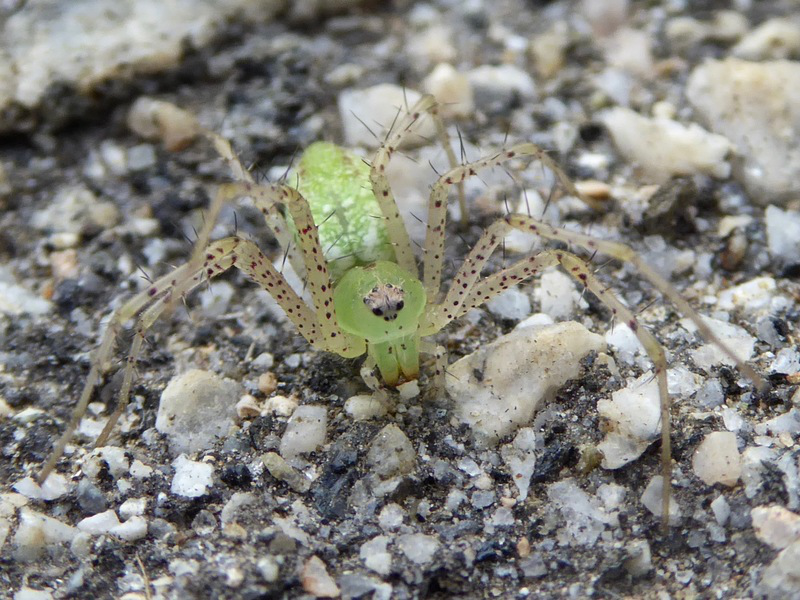

In [21]:
PIL.Image.open(str(Arachnida[100]))

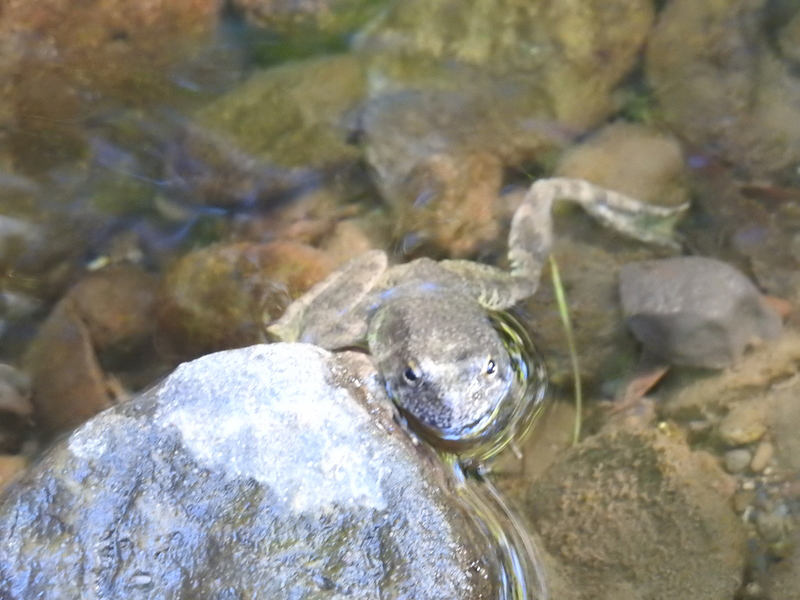

In [27]:
Amphibia = list(test_dir.glob('Amphibia/*'))
PIL.Image.open(str(Amphibia[8]))

In [28]:
test_count = len(list(test_dir.glob('*/*.jpg')))
print(test_count)

2000


In [38]:
train_nature_images_dict = {
    'Amphibia': list(train_dir.glob('Amphibia/*')),
    'Animalia': list(train_dir.glob('Animalia/*')),
    'Arachnida': list(train_dir.glob('Arachnida/*')),
    'Aves': list(train_dir.glob('Aves/*')),
    'Fungi': list(train_dir.glob('Fungi/*')),
    'Insecta': list(train_dir.glob('Insecta/*')),
    'Mammalia': list(train_dir.glob('Mammalia/*')),
    'Mollusca': list(train_dir.glob('Mollusca/*')),
    'Plantae': list(train_dir.glob('Plantae/*')),
    'Reptilia': list(train_dir.glob('Reptilia/*')),


}

In [39]:
nature_labels_dict = {
    'Amphibia': 0,
    'Animalia': 1,
    'Arachnida': 2,
    'Aves': 3,
    'Fungi': 4,
    'Insecta': 5,
    'Mammalia': 6,
    'Mollusca': 7,
    'Plantae': 8,
    'Reptilia': 9,

}

In [43]:
find . -name ".DS_Store" -delete

SyntaxError: ignored

In [69]:
x_train, y_train= [], []

for nature, images in train_nature_images_dict.items():
    for image in images:
        print(image)
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(10,10))
        x_train.append(resized_img)
        y_train.append(nature_labels_dict[nature])

/content/inaturalist_12K/train/Amphibia/d2acc34929734b067b2b93bff1b34d94.jpg
/content/inaturalist_12K/train/Amphibia/1dbb32b56537729f5373861c01e51418.jpg
/content/inaturalist_12K/train/Amphibia/1bc89b4744b13ef6a4154de08d158ac2.jpg
/content/inaturalist_12K/train/Amphibia/bcb6f5eaf9faee918fc22213d6c0621c.jpg
/content/inaturalist_12K/train/Amphibia/ba0830d3edbb92065bc4e3f53ad5a89d.jpg
/content/inaturalist_12K/train/Amphibia/5a7b273110d89fe0f03e492911058529.jpg
/content/inaturalist_12K/train/Amphibia/f2ee69b7b34be8ed7599c3115b6ec2b4.jpg
/content/inaturalist_12K/train/Amphibia/da76744e5eaa0651f77fdfcae0526a6c.jpg
/content/inaturalist_12K/train/Amphibia/90555a51983f62995fd744c589433b44.jpg
/content/inaturalist_12K/train/Amphibia/c6ce3d80e9b4ffd40c807719b53644d2.jpg
/content/inaturalist_12K/train/Amphibia/57642053bc16202b070c6197990af836.jpg
/content/inaturalist_12K/train/Amphibia/13722473b1958180404426fc4bce8c4a.jpg
/content/inaturalist_12K/train/Amphibia/94a4f54b3b7320f2c5a9faa2b757183e.jpg

error: ignored

In [ ]:
/content/inaturalist_12K/train/Fungi/.DS_Store

In [47]:
test_nature_images_dict = {
    'Amphibia': list(test_dir.glob('Amphibia/*')),
    'Animalia': list(test_dir.glob('Animalia/*')),
    'Arachnida': list(test_dir.glob('Arachnida/*')),
    'Aves': list(test_dir.glob('Aves/*')),
    'Fungi': list(test_dir.glob('Fungi/*')),
    'Insecta': list(test_dir.glob('Insecta/*')),
    'Mammalia': list(test_dir.glob('Mammalia/*')),
    'Mollusca': list(test_dir.glob('Mollusca/*')),
    'Plantae': list(test_dir.glob('Plantae/*')),
    'Reptilia': list(test_dir.glob('Reptilia/*')),

}


In [84]:
x_test, y_test= [], []

for nature, images in test_nature_images_dict.items():
    for image in images:
        print(image)
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x_test.append(resized_img)
        y_test.append(nature_labels_dict[nature])

/content/inaturalist_12K/val/Amphibia/478f57234aa142c8aceb995a49abbbfb.jpg
/content/inaturalist_12K/val/Amphibia/4094d0a8c6e39f55c353d267b3d65d45.jpg
/content/inaturalist_12K/val/Amphibia/88c92b593263e3c6724ee77e1b81f009.jpg
/content/inaturalist_12K/val/Amphibia/d6cdbb2a7b7317dc18d44c351b953e26.jpg
/content/inaturalist_12K/val/Amphibia/d88b333c876db3eed8497c047cbf6dcd.jpg
/content/inaturalist_12K/val/Amphibia/948b76107391f01f9955e68882a62b36.jpg
/content/inaturalist_12K/val/Amphibia/5a523daac3aebb91923a3222495ee316.jpg
/content/inaturalist_12K/val/Amphibia/efe5b9506605f9b4ce4c23fb333a930f.jpg
/content/inaturalist_12K/val/Amphibia/29420daac677a1994ebe0e54cf6a3976.jpg
/content/inaturalist_12K/val/Amphibia/94de3552b2c1cdf90c5623a81c027099.jpg
/content/inaturalist_12K/val/Amphibia/7f45fb6f58845ec8237bb4e9d3cced36.jpg
/content/inaturalist_12K/val/Amphibia/4021020892d42f7d52c4cdb289695f52.jpg
/content/inaturalist_12K/val/Amphibia/e671f5f3e964718928e6769bcd5b9c89.jpg
/content/inaturalist_12K/

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [85]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [86]:
#x_train = np.array(x_train)/255
x_test = x_test/255

In [94]:
def cnv(n_filter,s_filter,actv,n_neurons):
  output_classes = 10
  #n_filter=16
  #s_filter=3
  #actv='relu'
 # n_neuron=128
  model = Sequential([
    layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
    layers.MaxPooling2D(),
    layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
    layers.MaxPooling2D(),
    layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
    layers.MaxPooling2D(),
    layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
    layers.MaxPooling2D(),
    layers.Conv2D(n_filter, s_filter, padding='same', activation=actv),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(n_neurons, activation=actv),
    layers.Dense(output_classes)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
                
  model.fit(x_test, y_test, epochs=5)#x_train,y_train

In [95]:
cnv(16,3,'relu',128)

Epoch 1/5
63/63 [==============================] - 39s 617ms/step - loss: 2.3024 - accuracy: 0.1035
Epoch 2/5
63/63 [==============================] - 39s 612ms/step - loss: 2.2728 - accuracy: 0.1364
Epoch 3/5
63/63 [==============================] - 39s 611ms/step - loss: 2.2054 - accuracy: 0.1679
Epoch 4/5
63/63 [==============================] - 39s 611ms/step - loss: 2.1393 - accuracy: 0.2064
Epoch 5/5
63/63 [==============================] - 38s 606ms/step - loss: 2.0713 - accuracy: 0.2529


In [88]:
model.evaluate(x_test,y_test)


63/63 [==============================] - 17s 274ms/step - loss: 1.9710 - accuracy: 0.2875


[1.9709984064102173, 0.2874999940395355]